# TimeSeries

In [128]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [129]:
bitcoin = pd.read_csv('BTC-EUR.csv')

In [130]:
bitcoin.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,359.546204,361.468506,351.586884,355.957367,355.957367,16389166.0
1,2014-09-18,355.588409,355.505402,319.789459,328.539368,328.539368,26691849.0
2,2014-09-19,328.278503,330.936707,298.921021,307.761139,307.761139,29560103.0
3,2014-09-20,307.665253,329.978180,303.931244,318.758972,318.758972,28736826.0
4,2014-09-21,318.120514,321.504517,306.502197,310.632446,310.632446,20702625.0


## Observation des données de Close du bitcoin

In [89]:
bitcoin['Close'].plot(figsize=(9,6))

<AxesSubplot:>

## Travailler sur une base temporelle : DateTimeIndex

In [90]:
bitcoin.index

RangeIndex(start=0, stop=3037, step=1)

In [91]:
bitcoin = pd.read_csv('BTC-EUR.csv', index_col='Date')
bitcoin.index

Index(['2014-09-17', '2014-09-18', '2014-09-19', '2014-09-20', '2014-09-21',
       '2014-09-22', '2014-09-23', '2014-09-24', '2014-09-25', '2014-09-26',
       ...
       '2022-12-31', '2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04',
       '2023-01-05', '2023-01-06', '2023-01-07', '2023-01-08', '2023-01-09'],
      dtype='object', name='Date', length=3037)

In [131]:
bitcoin['Close'].plot(figsize=(9,6))
plt.show

<function matplotlib.pyplot.show(*, block=None)>

Indiquer à pandas que la colonne représente des dates

In [93]:
bitcoin = pd.read_csv('BTC-EUR.csv', index_col='Date', parse_dates=True)
bitcoin.index

DatetimeIndex(['2014-09-17', '2014-09-18', '2014-09-19', '2014-09-20',
               '2014-09-21', '2014-09-22', '2014-09-23', '2014-09-24',
               '2014-09-25', '2014-09-26',
               ...
               '2022-12-31', '2023-01-01', '2023-01-02', '2023-01-03',
               '2023-01-04', '2023-01-05', '2023-01-06', '2023-01-07',
               '2023-01-08', '2023-01-09'],
              dtype='datetime64[ns]', name='Date', length=3037, freq=None)

## Analyse des données : Années, mois, semaines, jours etc..

### 2019

In [94]:
bitcoin['2019']['Close'].plot()

C:\Users\fredd\AppData\Local\Temp\ipykernel_5924\242990758.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  bitcoin['2019']['Close'].plot()


<AxesSubplot:xlabel='Date'>

### Septembre 2019

In [95]:
bitcoin['2019-09']['Close'].plot()

C:\Users\fredd\AppData\Local\Temp\ipykernel_5924\361147746.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  bitcoin['2019-09']['Close'].plot()


<AxesSubplot:xlabel='Date'>

### Exemple de slicing : Entre 2017 et 2019

In [96]:
bitcoin['2017':'2019']['Close'].plot()

<AxesSubplot:xlabel='Date'>

#### Exemple avec la méthode loc

In [97]:
bitcoin.loc['2017':'2019']['Close'].plot()

<AxesSubplot:xlabel='Date'>

## Resample : Regrouper nos données selon une fréquence temporelle
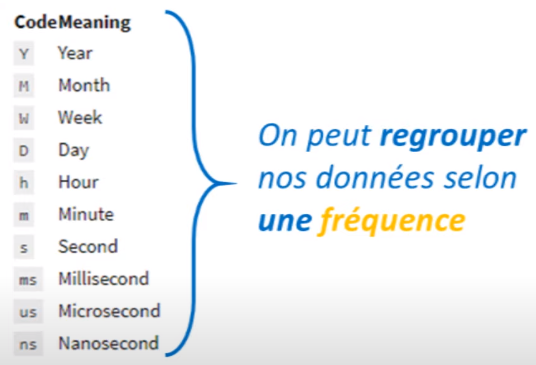

### 2019 : regroupement par mois

In [98]:
bitcoin.loc['2019', 'Close'].resample('M').plot()
plt.show()

### 2019 : La moyenne sur chaque mois

In [99]:
bitcoin.loc['2019', 'Close'].resample('M').mean().plot()
plt.show()

### 2019 : La moyenne sur chaque semaine

In [100]:
bitcoin.loc['2019', 'Close'].resample('W').mean().plot()
plt.show()

### 2019 : La moyenne toute les 2 semaine

In [101]:
bitcoin.loc['2019', 'Close'].resample('2W').mean().plot()
plt.show()

### 2019 : Ecart type du bitcoin en 2019
Observations : Le bitcoin était très volatile en 2019

In [102]:
bitcoin.loc['2019', 'Close'].resample('2W').std().plot()
plt.show()

### Afficher toutes les courbes sur un seul et même graphique (pratique courante)

In [103]:
plt.figure(figsize=(12,8))
bitcoin.loc['2019', 'Close'].plot()
bitcoin.loc['2019', 'Close'].resample('M').mean().plot(label='Moyenne par mois', lw=3, ls=':', alpha=0.8)
bitcoin.loc['2019', 'Close'].resample('W').mean().plot(label='Moyenne par semaine', lw=2, ls='--', alpha=0.8)
plt.legend()
plt.show()

## Aggregate
Rassembler dans un seul tableau plusieurs statistiques qu'on aimerais faire par dessus resample

### 2019 : 

In [104]:
bitcoin.loc['2019', 'Close'].resample('W').agg(['mean', 'std', 'min', 'max'])

,mean,std,min,max
Date,,,,
2019-01-06,3422.916626,86.768296,3353.505859,3572.601807
2019-01-13,3317.593401,180.066248,3100.221680,3518.607910
2019-01-20,3216.173340,36.646566,3168.373535,3280.021484
2019-01-27,3157.861154,15.218334,3140.374756,3183.176025
2019-02-03,3035.448347,19.472269,3015.454102,3073.150146
2019-02-10,3114.468541,123.483779,2998.157227,3258.583740
2019-02-17,3222.201835,17.498269,3202.042725,3252.190186
2019-02-24,3500.129360,88.628342,3359.558594,3653.833008
2019-03-03,3392.695312,12.224585,3381.982910,3416.384521


In [105]:
m = bitcoin['Close'].resample('W').agg(['mean', 'std', 'min', 'max'])

plt.figure(figsize=(12,8))
m['mean']['2019'].plot(label='Moyenne par semaine')
plt.fill_between(m.index, m['max'], m['min'], alpha=0.2, label='Min-max par semaine')

plt.legend()
plt.show()

## Moving Average 
Une technique qui permet de calculer une moyenne mais plutot que de faire la moyenne de toutes les valeurs que l'on aurait (par exemple) en 2019, on va faire la moyenne sur une **fenettre de valeurs**. Exemple pour une fenettre de 7 jours, on va calculer la moyenne, puis on va se décaler d'un jour dans cette fenettre, puis on recalcule la moyenne etc. Donc avec pandas on va executer une fonction qui effecture un roulement (**rolling**) et à l'intérieur de cette fonction qui effectue un roulement, on va définir une taille pour notre fenettre (**fenettre de valeur** => **window**)

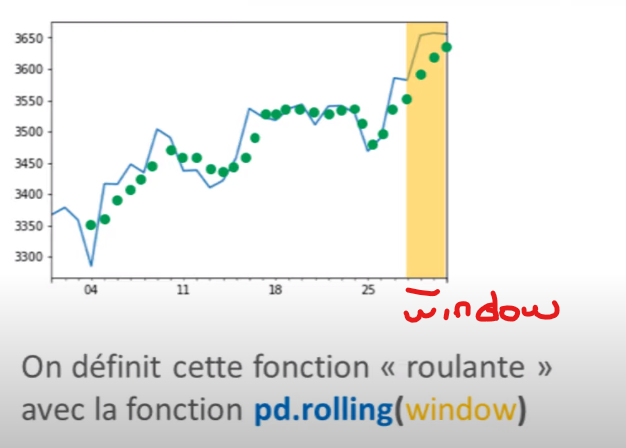

In [106]:
bitcoin.loc['2019', 'Close'].rolling(window=7)

Rolling [window=7,center=False,axis=0,method=single]

### Utiliser cette fonction pour calculer une moyenne

In [107]:
bitcoin.loc['2019', 'Close'].rolling(window=7).mean().plot()

<AxesSubplot:xlabel='Date'>

### 2019 : Comparaison avec le signal original

In [108]:
plt.figure(figsize=(12,8))
bitcoin.loc['2019', 'Close'].plot()
bitcoin.loc['2019', 'Close'].rolling(window=7).mean().plot(label='Moving average', lw=3, ls=':', alpha=0.8)

plt.legend()
plt.show()

### Septembre 2019

In [109]:
plt.figure(figsize=(12,8))
bitcoin.loc['2019-09', 'Close'].plot()
bitcoin.loc['2019-09', 'Close'].rolling(window=7).mean().plot(label='Moving average', lw=3, ls=':', alpha=0.8)

plt.legend()
plt.show()

### 2019 : Moving average par le centre de la fenettre

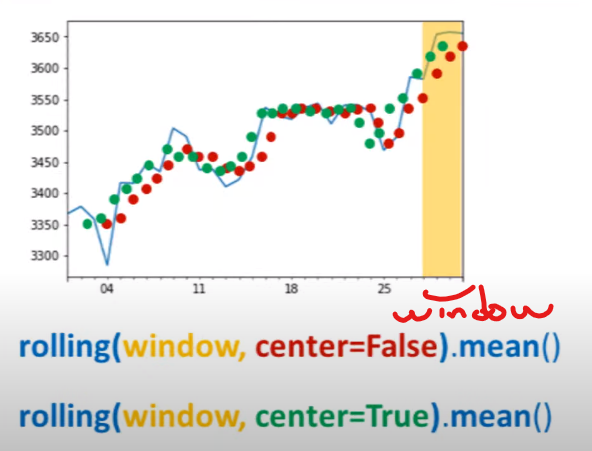

In [110]:
plt.figure(figsize=(12,8))
bitcoin.loc['2019-09', 'Close'].plot()
bitcoin.loc['2019-09', 'Close'].rolling(window=7).mean().plot(label='Moving average', lw=3, ls=':', alpha=0.8)
bitcoin.loc['2019-09', 'Close'].rolling(window=7, center=True).mean().plot(label='Moving average from window center', lw=3, ls=':', alpha=0.8)

plt.legend()
plt.show()

## Exponential Weighted Function

In [111]:
plt.figure(figsize=(12,8))
bitcoin.loc['2019-09', 'Close'].plot()
bitcoin.loc['2019-09', 'Close'].rolling(window=7).mean().plot(label='Moving average', lw=3, ls=':', alpha=0.8)
bitcoin.loc['2019-09', 'Close'].rolling(window=7, center=True).mean().plot(label='Moving average from window center', lw=3, ls=':', alpha=0.8)
bitcoin.loc['2019-09', 'Close'].ewm(alpha=0.6).mean().plot(label='Moving average from window center', lw=3, ls=':', alpha=0.8)

plt.legend()
plt.show()

In [112]:
plt.figure(figsize=(12,8))
bitcoin.loc['2019-09', 'Close'].plot()
for i in np.arange(0.2, 1, 0.2):
    bitcoin.loc['2019-09', 'Close'].ewm(alpha=i).mean().plot(label=f'ewm {i}', lw=3, ls=':', alpha=0.8)

plt.legend()
plt.show()

# Assembler des datasets

In [113]:
ethereum = pd.read_csv('ETH-EUR.csv', index_col='Date', parse_dates=True)
ethereum.index

DatetimeIndex(['2017-11-11', '2017-11-12', '2017-11-13', '2017-11-14',
               '2017-11-15', '2017-11-16', '2017-11-17', '2017-11-18',
               '2017-11-19', '2017-11-20',
               ...
               '2022-12-31', '2023-01-01', '2023-01-02', '2023-01-03',
               '2023-01-04', '2023-01-05', '2023-01-06', '2023-01-07',
               '2023-01-08', '2023-01-09'],
              dtype='datetime64[ns]', name='Date', length=1886, freq=None)

In [114]:
ethereum['2019']['Close'].plot()

C:\Users\fredd\AppData\Local\Temp\ipykernel_5924\3896088478.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  ethereum['2019']['Close'].plot()


<AxesSubplot:xlabel='Date'>

In [115]:
pd.merge(bitcoin, ethereum, on='Date', how='inner')

,Open_x,High_x,Low_x,Close_x,Adj Close_x,Volume_x,Open_y,High_y,Low_y,Close_y,Adj Close_y,Volume_y
Date,,,,,,,,,,,,
2017-11-11,5674.877930,5893.123535,5319.574707,5451.084473,5451.084473,4.208763e+09,256.011322,273.902954,255.673492,269.811371,269.811371,7.221993e+08
2017-11-12,5397.796387,5680.399414,4732.066895,5102.976074,5102.976074,7.682118e+09,269.819092,273.739624,255.948730,264.072021,264.072021,1.383774e+09
2017-11-13,5092.838867,5835.995117,5016.558105,5624.187988,5624.187988,5.370188e+09,263.314758,281.949707,263.405121,271.556213,271.556213,8.933293e+08
2017-11-14,5625.894043,5796.897949,5494.685547,5628.764160,5628.764160,2.711943e+09,271.596497,290.873871,271.573212,286.394958,286.394958,9.073543e+08
2017-11-15,5627.924316,6227.523438,5626.492188,6209.081543,6209.081543,3.565507e+09,286.677399,289.079956,279.644714,282.937531,282.937531,6.133644e+08
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-05,15900.061523,15902.215820,15902.749023,16002.543945,16002.543945,1.301434e+10,1184.701660,1185.385620,1180.071655,1188.484375,1188.484375,3.803514e+09
2023-01-06,16002.293945,15960.681641,15921.389648,15896.708984,15896.708984,1.351641e+10,1188.503784,1196.045410,1182.728394,1190.360107,1190.360107,4.667419e+09
2023-01-07,15896.847656,15945.719727,15861.756836,15900.098633,15900.098633,7.234739e+09,1190.398315,1193.554321,1183.730103,1185.604858,1185.604858,2.405601e+09


In [116]:
pd.merge(bitcoin, ethereum, on='Date', how='outer', suffixes=('_btc', '_eth'))

,Open_btc,High_btc,Low_btc,Close_btc,Adj Close_btc,Volume_btc,Open_eth,High_eth,Low_eth,Close_eth,Adj Close_eth,Volume_eth
Date,,,,,,,,,,,,
2014-09-17,359.546204,361.468506,351.586884,355.957367,355.957367,1.638917e+07,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-18,355.588409,355.505402,319.789459,328.539368,328.539368,2.669185e+07,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-19,328.278503,330.936707,298.921021,307.761139,307.761139,2.956010e+07,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-20,307.665253,329.978180,303.931244,318.758972,318.758972,2.873683e+07,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-21,318.120514,321.504517,306.502197,310.632446,310.632446,2.070262e+07,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-05,15900.061523,15902.215820,15902.749023,16002.543945,16002.543945,1.301434e+10,1184.701660,1185.385620,1180.071655,1188.484375,1188.484375,3.803514e+09
2023-01-06,16002.293945,15960.681641,15921.389648,15896.708984,15896.708984,1.351641e+10,1188.503784,1196.045410,1182.728394,1190.360107,1190.360107,4.667419e+09
2023-01-07,15896.847656,15945.719727,15861.756836,15900.098633,15900.098633,7.234739e+09,1190.398315,1193.554321,1183.730103,1185.604858,1185.604858,2.405601e+09


In [117]:
btc_eth = pd.merge(bitcoin, ethereum, on='Date', how='inner', suffixes=('_btc', '_eth'))

In [118]:
btc_eth[['Close_btc', 'Close_eth']].plot(figsize=(12, 8))

<AxesSubplot:xlabel='Date'>

### Pour que les 2 datasets soient plus lisibles à leurs échel

In [119]:
btc_eth[['Close_btc', 'Close_eth']].plot(subplots=True, figsize=(12, 8))

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

### Obtenir la matrice de correlation

Ici 0.927807 => 92% de correlation. (Observation : Très élevé)

In [120]:
btc_eth[['Close_btc', 'Close_eth']].corr()

,Close_btc,Close_eth
Close_btc,1.000000,0.927807
Close_eth,0.927807,1.000000


In [121]:
import seaborn as sns
correlations = btc_eth[['Close_btc', 'Close_eth']].corr()
sns.heatmap(correlations)

<AxesSubplot:>

# Exercice : Trading Strategy => Turtle Strategy
Vielle technique de trading afin de décider quand acheter ou vendre du bitcoin en fonction de la valeur de 'Close' par rapport au minimum ou au maximum des 28 derniers jours. 

In [122]:
bitcoin['Close']['2019'].diff().plot()

<AxesSubplot:xlabel='Date'>

In [123]:
bitcoin['Close']['2019-06': '2019-07'].diff().plot()

<AxesSubplot:xlabel='Date'>

In [124]:
%matplotlib

Using matplotlib backend: QtAgg


In [125]:
data = bitcoin.copy()
data['Buy'] = np.zeros(len(data))
data['Sell'] = np.zeros(len(data))

In [126]:
data['RollingMax'] = data['Close'].shift(1).rolling(window=28).max()
data['RollingMin'] = data['Close'].shift(1).rolling(window=28).min()
data.loc[data['RollingMax'] < data['Close'], 'Buy'] = 1
data.loc[data['RollingMin'] > data['Close'], 'Sell'] = -1

In [127]:
start = '2019'
end = '2019'
fig, ax = plt.subplots(2, figsize=(12, 8), sharex=True)
#plt.figure(figsize=(12 8))
#plt.subplot(211)
ax[0].plot(data['Close'][start:end])
ax[0].plot(data['RollingMax'][start:end])
ax[0].plot(data['RollingMin'][start:end])
ax[0].legend(['close', 'min', 'max'])
ax[1].plot(data['Buy'][start:end], c='g')
ax[1].plot(data['Sell'][start:end], c='r')
ax[1].legend(['buy', 'sell'])
